# Lung Cancer Detection | 2. EDA
-> Perform Univariate and Multivariate analysis and draw conclusions from there.

->Explore Correlation Matrix(can try different methods and search if they give the same conclusion and why)

->Check the distribution(skewness) of the columns

->Detect Outliers(don't remove)

->Detect Class Label Imbalance

## 1. Perform Univariate and Multivariate analysis and draw conclusions from there.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load the dataset
lung_cancer_data = pd.read_csv(r'C:\Users\CHARANI\Downloads\archive.zip')

<Axes: xlabel='GENDER', ylabel='Count'>

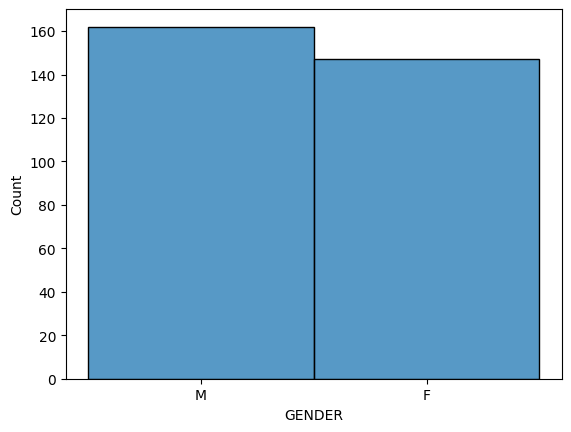

In [5]:
sns.histplot(lung_cancer_data['GENDER'])

From the above histogram plot we can say that there are 52% male and 48% female in the dataset.

<Axes: xlabel='AGE', ylabel='Count'>

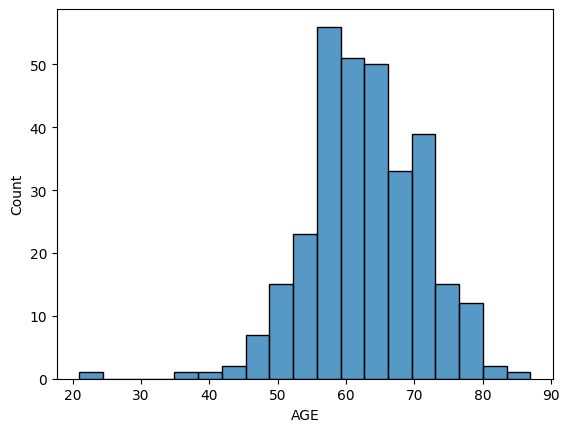

In [6]:
sns.histplot(lung_cancer_data['AGE'])

<Axes: ylabel='AGE'>

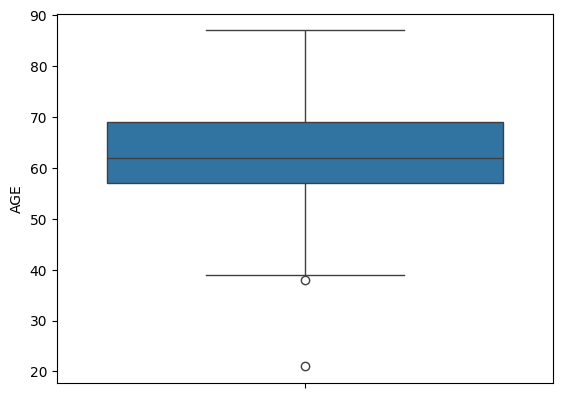

In [7]:
sns.boxplot(lung_cancer_data['AGE']) # boxplot for Age

The age distribution is slightly right-skewed, indicating that there are more older individuals in the dataset. This suggests that age may be a significant factor in lung cancer risk.

The box-plot shows it has outliers

<Axes: xlabel='SMOKING', ylabel='Count'>

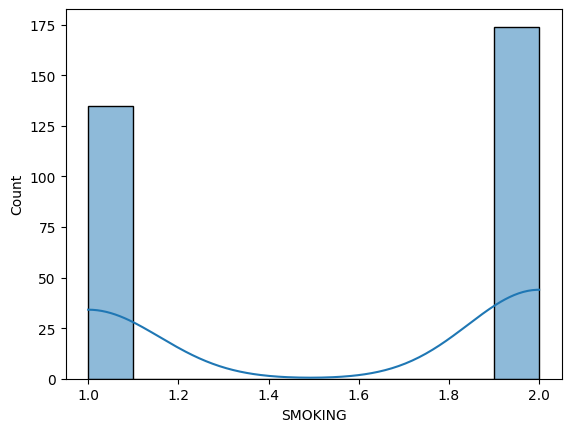

In [8]:
sns.histplot(lung_cancer_data['SMOKING'], kde = True)

High intensity smoking individuals(175) are more compared to low intensity smokers(~130).

<Axes: xlabel='YELLOW_FINGERS', ylabel='Count'>

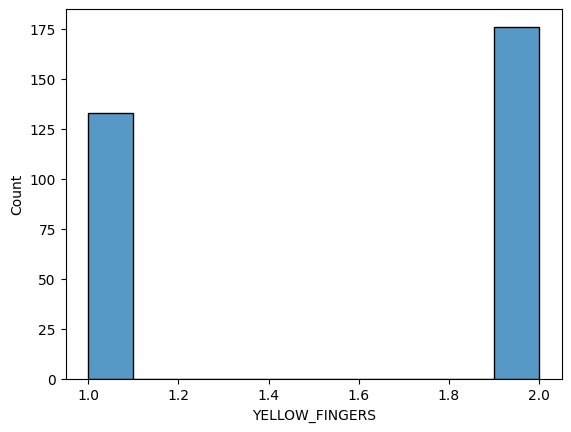

In [9]:
sns.histplot(lung_cancer_data['YELLOW_FINGERS'])

Presence of yellow fingers, potentially associated with lifestyle choices or health conditions are high in number. 

<Axes: xlabel='ANXIETY', ylabel='Count'>

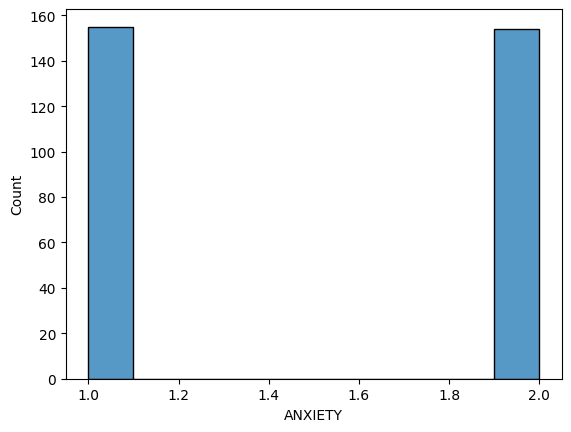

In [10]:
sns.histplot(lung_cancer_data['ANXIETY'])

From the above histogram, we can say number of people with anxiety and without anxiety is same which suggets equal particition.

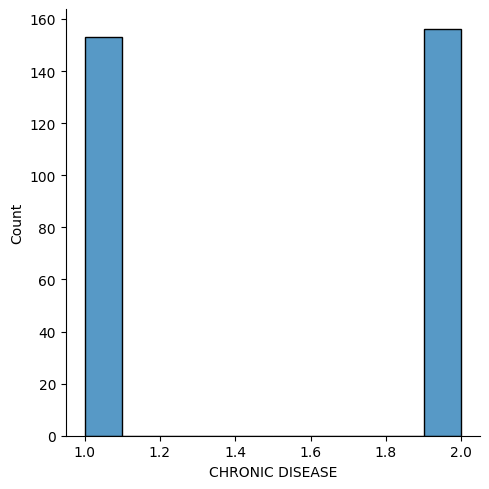

In [11]:
sns.displot(lung_cancer_data['CHRONIC DISEASE'])

From the above histogram, we can say number of people with chronic disease and without chronic disease is same which suggets equal particition.

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='Count'>

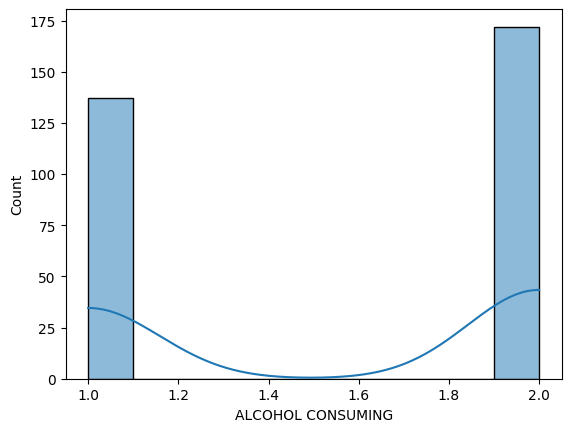

In [12]:
sns.histplot(lung_cancer_data['ALCOHOL CONSUMING'], kde=True)

People consuming alcohol are higher compared to the people without alcohol consumption.

<Axes: xlabel='CHEST PAIN', ylabel='Count'>

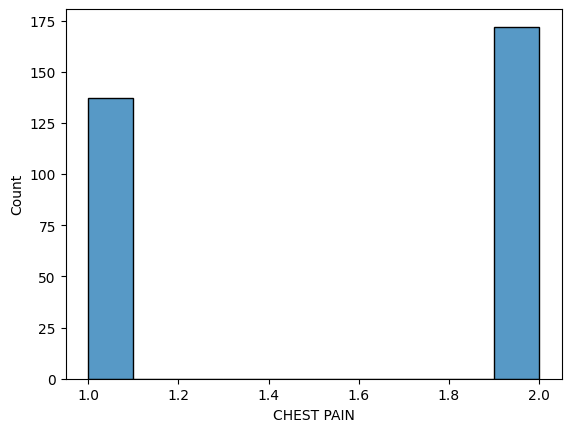

In [13]:
sns.histplot(lung_cancer_data['CHEST PAIN'])

From the histogram, people suffering from chest pain(175) is more compared to people with no chest pain(~130).

<Axes: xlabel='COUGHING', ylabel='Count'>

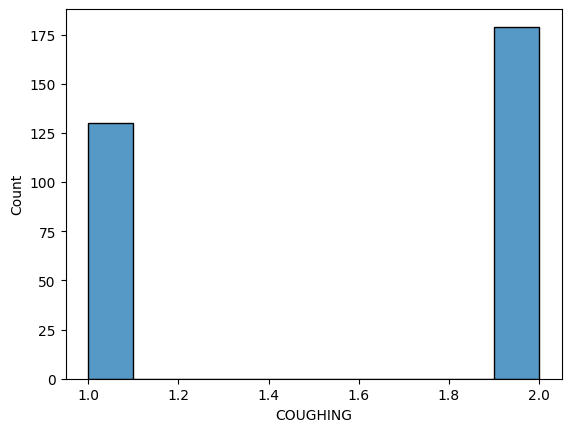

In [14]:
sns.histplot(lung_cancer_data['COUGHING'])

From the histogram, people with severe coughing(175) is more compared to people with low coughing(~125).

<Axes: xlabel='LUNG_CANCER', ylabel='Count'>

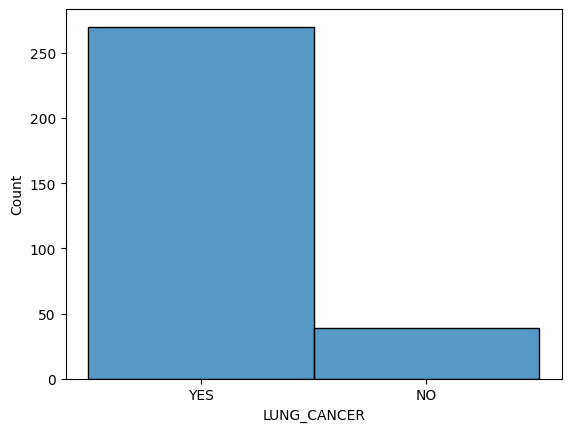

In [15]:
sns.histplot(lung_cancer_data['LUNG_CANCER'])

More than 250 people has lung cancer less than 50 people have no lung cancer

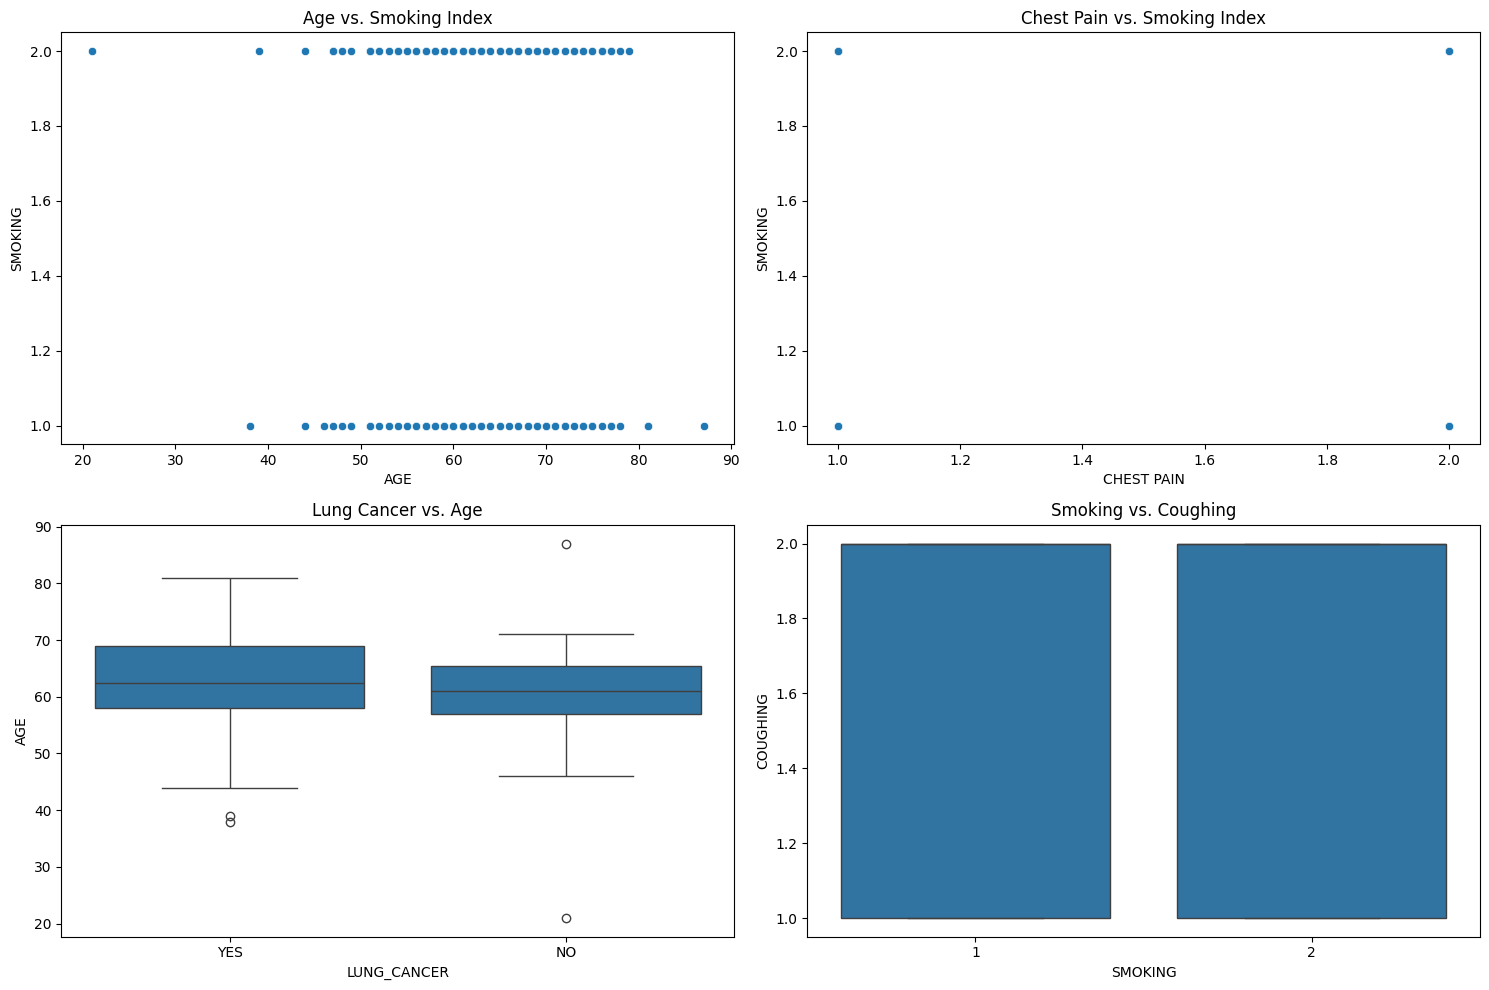

In [16]:
# Multivariate Analysis - Scatter Plots
plt.figure(figsize=(15, 10))

# Scatter plots between pairs of numerical features
plt.subplot(2, 2, 1)
sns.scatterplot(data=lung_cancer_data, x='AGE', y='SMOKING')
plt.title('Age vs. Smoking Index')

plt.subplot(2, 2, 2)
sns.scatterplot(data=lung_cancer_data, x='CHEST PAIN', y='SMOKING')
plt.title('Chest Pain vs. Smoking Index')

# Box plot for Chronic Lung Disease vs. Age
plt.subplot(2, 2, 3)
sns.boxplot(data=lung_cancer_data, x='LUNG_CANCER', y='AGE')
plt.title('Lung Cancer vs. Age')

plt.subplot(2, 2, 4)
sns.boxplot(data=lung_cancer_data, x='SMOKING', y='COUGHING')
plt.title('Smoking vs. Coughing')

plt.tight_layout()
plt.show()

## 2. Explore Correlation Matrix(can try different methods and search if they give the same conclusion and why)

**Pearson correlational technique**: Measures the linear relationship between two continuous variables. 1:1 relation, if one increases the other increases, and vice-versa. Linear

In [17]:
lung_cancer_data['GENDER'] =lung_cancer_data['GENDER'].replace({'M':1,'F':2})
lung_cancer_data['LUNG_CANCER'] =lung_cancer_data['LUNG_CANCER'].replace({'NO':1,'YES':2})

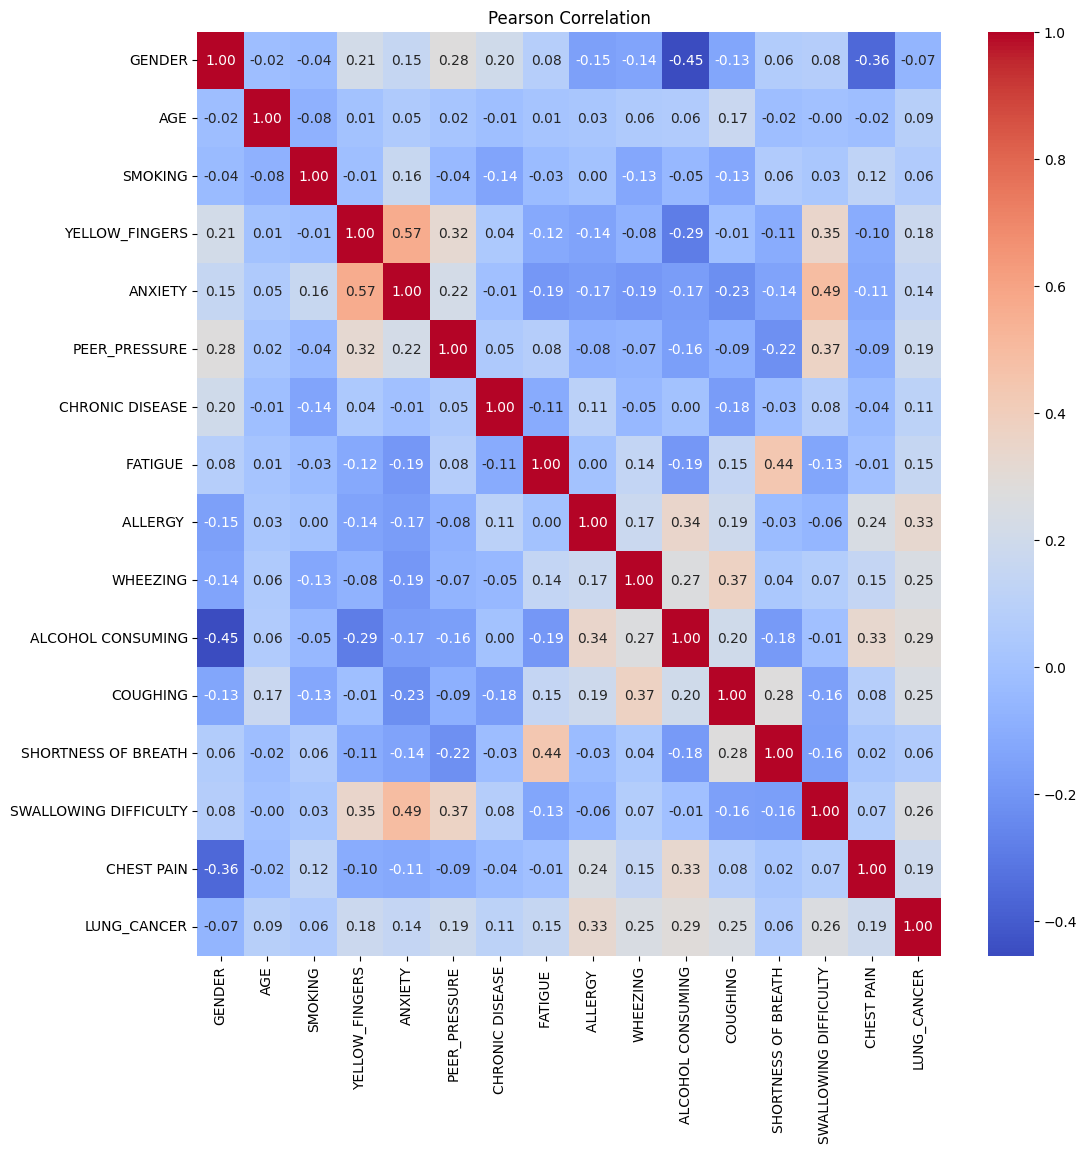

In [18]:
numerical_columns = lung_cancer_data.select_dtypes(include=np.number)
pearson_corr = numerical_columns.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation')
plt.show()

**Features that Lung_Cancer depends on the most:**

* ALLERGY

* ALCOHOL CONSUMING

* SWALLOWING DIFFICULTY

* WEEZING

* COUGHING

---


**Spearman correlational technique**: Measures the monotonic relationship between two variables, capturing all trends seen. as coeff increases, the correlation increases more. Non-linear

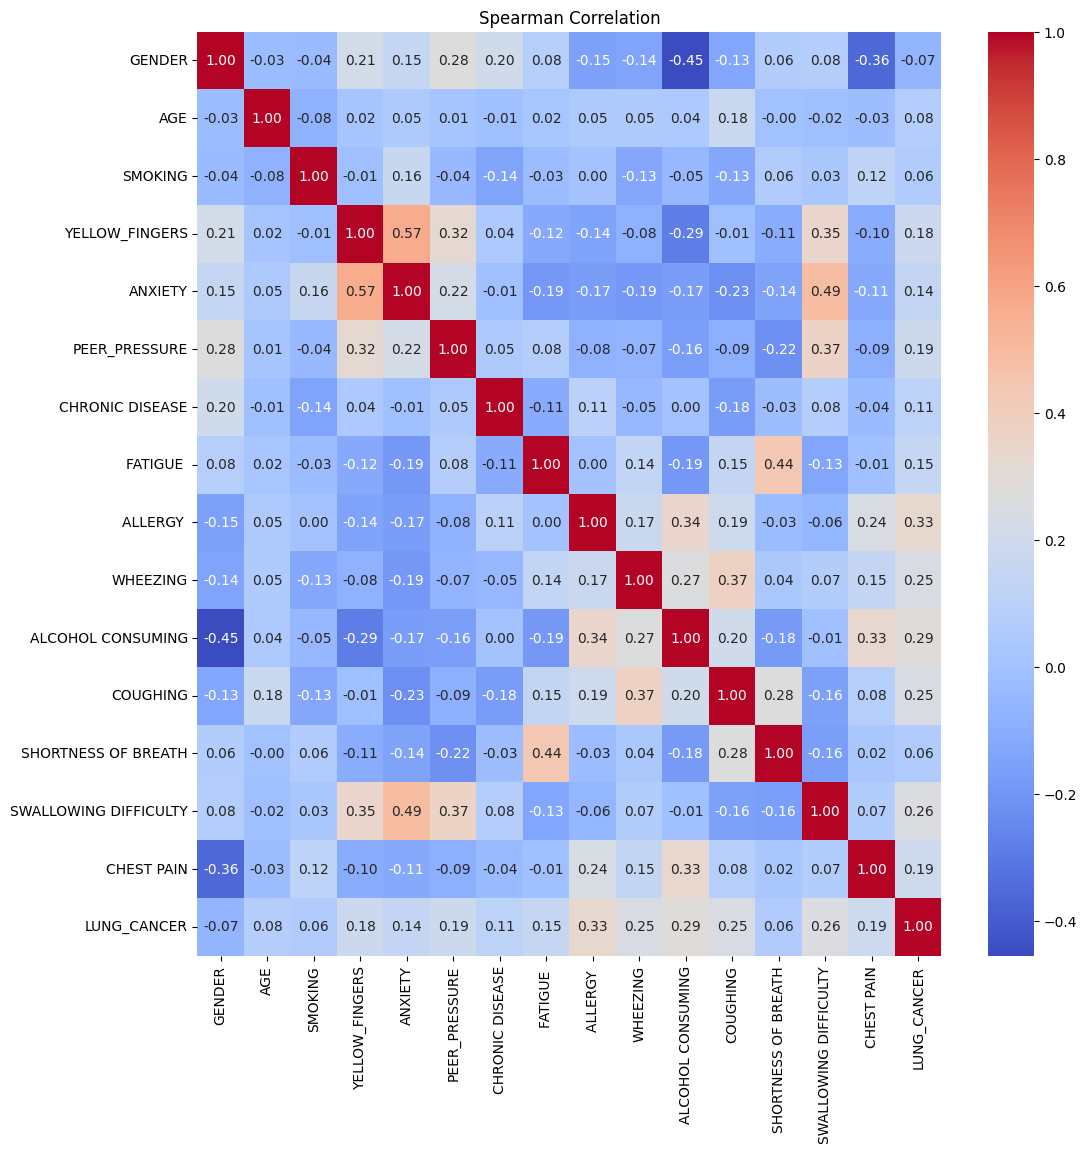

In [19]:
spearman_corr = numerical_columns.corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation')
plt.show()

**Features that Lung_Cancer depends on the most:**

* ALLERGY

* ALCOHOL CONSUMING

* SWALLOWING DIFFICULTY

* WEEZING

* COUGHING

---


**Kendall correlational technique**: Measures the ordinal relationship between two variables, which means it captures the direction and significance of the ranking order. co-dependence is shown in a more concise way as importance of one influences the other more. Non-linear

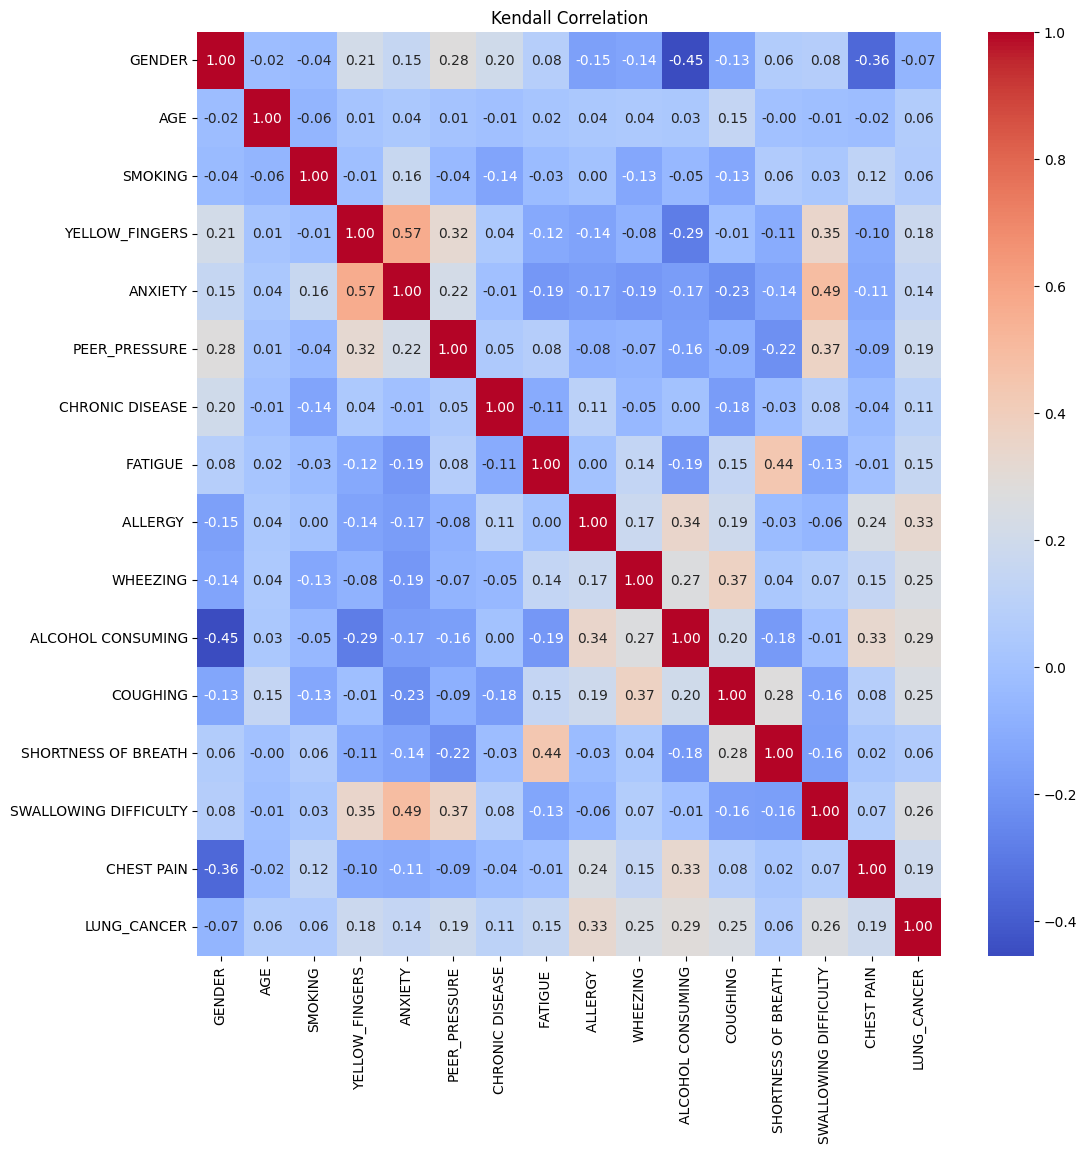

In [20]:
kendall_corr = numerical_columns.corr(method='kendall')
plt.figure(figsize=(12,12))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation')
plt.show()

**Features that Lung_Cancer depends on the most:**

* ALLERGY

* ALCOHOL CONSUMING

* SWALLOWING DIFFICULTY

* WEEZING

* COUGHING

---

**OVERALL INSGIHTS**

THESE TOP 5 FEATURES ARE MOST CRITICAL IN ORDER TO INDENTIFY IF A PERSON HAS LUNG CANCER WHICH ARE:


* ALLERGY

* ALCOHOL CONSUMING

* SWALLOWING DIFFICULTY

* WEEZING

* COUGHING


## 3. Check the distribution(skewness) of the columns

In [21]:
# Select numerical columns
numerical_columns = lung_cancer_data.select_dtypes(include=np.number).columns

# Calculate skewness for each numerical column
skewness = lung_cancer_data[numerical_columns].skew()

# Print skewness of each column
print("Skewness of Numerical Columns:")
print(skewness)

Skewness of Numerical Columns:
GENDER                   0.097677
AGE                     -0.395086
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
LUNG_CANCER             -2.262112
dtype: float64


## 4. Detect Outliers(don't remove)

In [22]:
from scipy import stats

# Select numerical features for outlier detection
numerical_features = ['AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'COUGHING', 'CHRONIC DISEASE']

# Calculate z-scores for numerical features
z_scores = np.abs(stats.zscore(lung_cancer_data[numerical_features]))

# Threshold for outlier detection
threshold = 3

# Find outlier indices
outlier_indices = np.where(z_scores > threshold)

# Print indices of outliers detected using z-score method
outliers_dict = {}
for i, feature in enumerate(numerical_features):
    outliers_dict[feature] = outlier_indices[0][outlier_indices[1] == i]

# Print indices of outliers detected using z-score method for each feature
for feature, indices in outliers_dict.items():
    if len(indices) > 0:
        print(f"Outliers detected in '{feature}': {indices}")
    else:
        print(f"No outliers detected in '{feature}' using z-score method.")

Outliers detected in 'AGE': [ 22 238]
No outliers detected in 'SMOKING' using z-score method.
No outliers detected in 'ALCOHOL CONSUMING' using z-score method.
No outliers detected in 'COUGHING' using z-score method.
No outliers detected in 'CHRONIC DISEASE' using z-score method.


In [23]:
numerical_features=lung_cancer_data.select_dtypes(include=np.number)
# Calculate IQR for each numerical feature
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = (numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))

# Print indices of outliers detected using the IQR method
print("\nOutliers detected using IQR method:")
for feature in numerical_features.columns:
    outliers = numerical_features[feature][outliers_iqr[feature]].index
    if len(outliers) > 0:
        print(f"{feature}: {outliers.values}")
    else:
        print(f"{feature}: No outliers detected")


Outliers detected using IQR method:
GENDER: No outliers detected
AGE: [ 22 238]
SMOKING: No outliers detected
YELLOW_FINGERS: No outliers detected
ANXIETY: No outliers detected
PEER_PRESSURE: No outliers detected
CHRONIC DISEASE: No outliers detected
FATIGUE : No outliers detected
ALLERGY : No outliers detected
WHEEZING: No outliers detected
ALCOHOL CONSUMING: No outliers detected
COUGHING: No outliers detected
SHORTNESS OF BREATH: No outliers detected
SWALLOWING DIFFICULTY: No outliers detected
CHEST PAIN: No outliers detected
LUNG_CANCER: [  2   3   4   8  12  14  19  22  27  29  30  32  34  37  49  61  80 129
 153 154 156 157 159 171 183 207 215 221 245 249 262 266 270 272 277 280
 281 282 286]


## 5.  Detect Class Label Imbalance

In [24]:
for i in ['LUNG_CANCER','AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'COUGHING', 'ANXIETY']:
    count = lung_cancer_data[i].value_counts()
    print(count)
    print()

LUNG_CANCER
2    270
1     39
Name: count, dtype: int64

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

SMOKING
2    174
1    135
Name: count, dtype: int64

ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64

COUGHING
2    179
1    130
Name: count, dtype: int64

ANXIETY
1    155
2    154
Name: count, dtype: int64

